In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Link Dataset**
https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset/data


### **Target Column**

* **`diagnosis`**: Diagnosis of breast cancer (`M` = malignant, `B` = benign).


**dataset description**

| **Column Name**           | **Description**                                              |
| ------------------------- | ------------------------------------------------------------ |
| `diagnosis`               | Diagnosis of breast cancer (`M` = malignant, `B` = benign)   |
| `radius_mean`             | Mean of distances from the center to points on the perimeter |
| `texture_mean`            | Mean of variation in gray-scale intensities                  |
| `perimeter_mean`          | Mean perimeter of the cell nuclei                            |
| `area_mean`               | Mean area of the cell nuclei                                 |
| `smoothness_mean`         | Mean local variation in radius lengths                       |
| `compactness_mean`        | Mean of (perimeter² / area - 1.0)                            |
| `concavity_mean`          | Mean severity of concave portions of the contour             |
| `concave points_mean`     | Mean number of concave portions of the contour               |
| `symmetry_mean`           | Mean symmetry of the cell                                    |
| `fractal_dimension_mean`  | Mean complexity of the contour                               |
| `radius_se`               | Standard error of the radius                                 |
| `texture_se`              | Standard error of the texture                                |
| `perimeter_se`            | Standard error of the perimeter                              |
| `area_se`                 | Standard error of the area                                   |
| `smoothness_se`           | Standard error of the smoothness                             |
| `compactness_se`          | Standard error of the compactness                            |
| `concavity_se`            | Standard error of the concavity                              |
| `concave points_se`       | Standard error of the concave points                         |
| `symmetry_se`             | Standard error of the symmetry                               |
| `fractal_dimension_se`    | Standard error of the fractal dimension                      |
| `radius_worst`            | Worst (largest) radius                                       |
| `texture_worst`           | Worst texture                                                |
| `perimeter_worst`         | Worst perimeter                                              |
| `area_worst`              | Worst area                                                   |
| `smoothness_worst`        | Worst smoothness                                             |
| `compactness_worst`       | Worst compactness                                            |
| `concavity_worst`         | Worst concavity                                              |
| `concave points_worst`    | Worst concave points                                         |
| `symmetry_worst`          | Worst symmetry                                               |
| `fractal_dimension_worst` | Worst fractal dimension                                      |




In [3]:
!pip install catboost -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.5 MB/s eta 0:00:00


# Read Dataset

In [4]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from scikit-learn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
# Evaluation metrics
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score,
                             classification_report, confusion_matrix, roc_auc_score, roc_curve)
from sklearn.preprocessing import label_binarize
# SMOTE and Pipeline to avoid data leakage during cross-validation
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Additional models: XGBoost, LightGBM, CatBoost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
import time
from tqdm import tqdm

In [5]:
df= pd.read_csv('/content/drive/MyDrive/Machine Learning 2025/Projects/breast-cancer/breast-cancer.csv')

## Show sample data

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Show shape of data

In [7]:
df.shape

(569, 32)

## Remove id clumns

In [8]:
df.drop('id',axis=1,inplace = True)

## Show name of Columns

In [9]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Show information of data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# Pre Processing

## Check Null Value

In [11]:
df.isnull().sum().sum()

np.int64(0)

## Check Duplicated

In [12]:
df.duplicated().sum()

np.int64(0)

## Check Balancing of output

<Axes: xlabel='diagnosis', ylabel='count'>

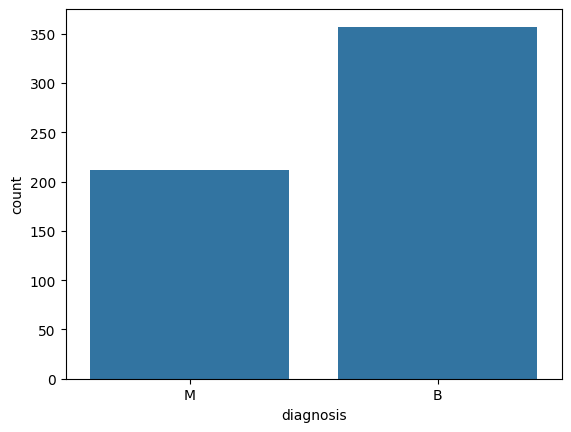

In [13]:
sns.countplot(data=df,x = 'diagnosis')

# EDA

## Histogram of numeric columns

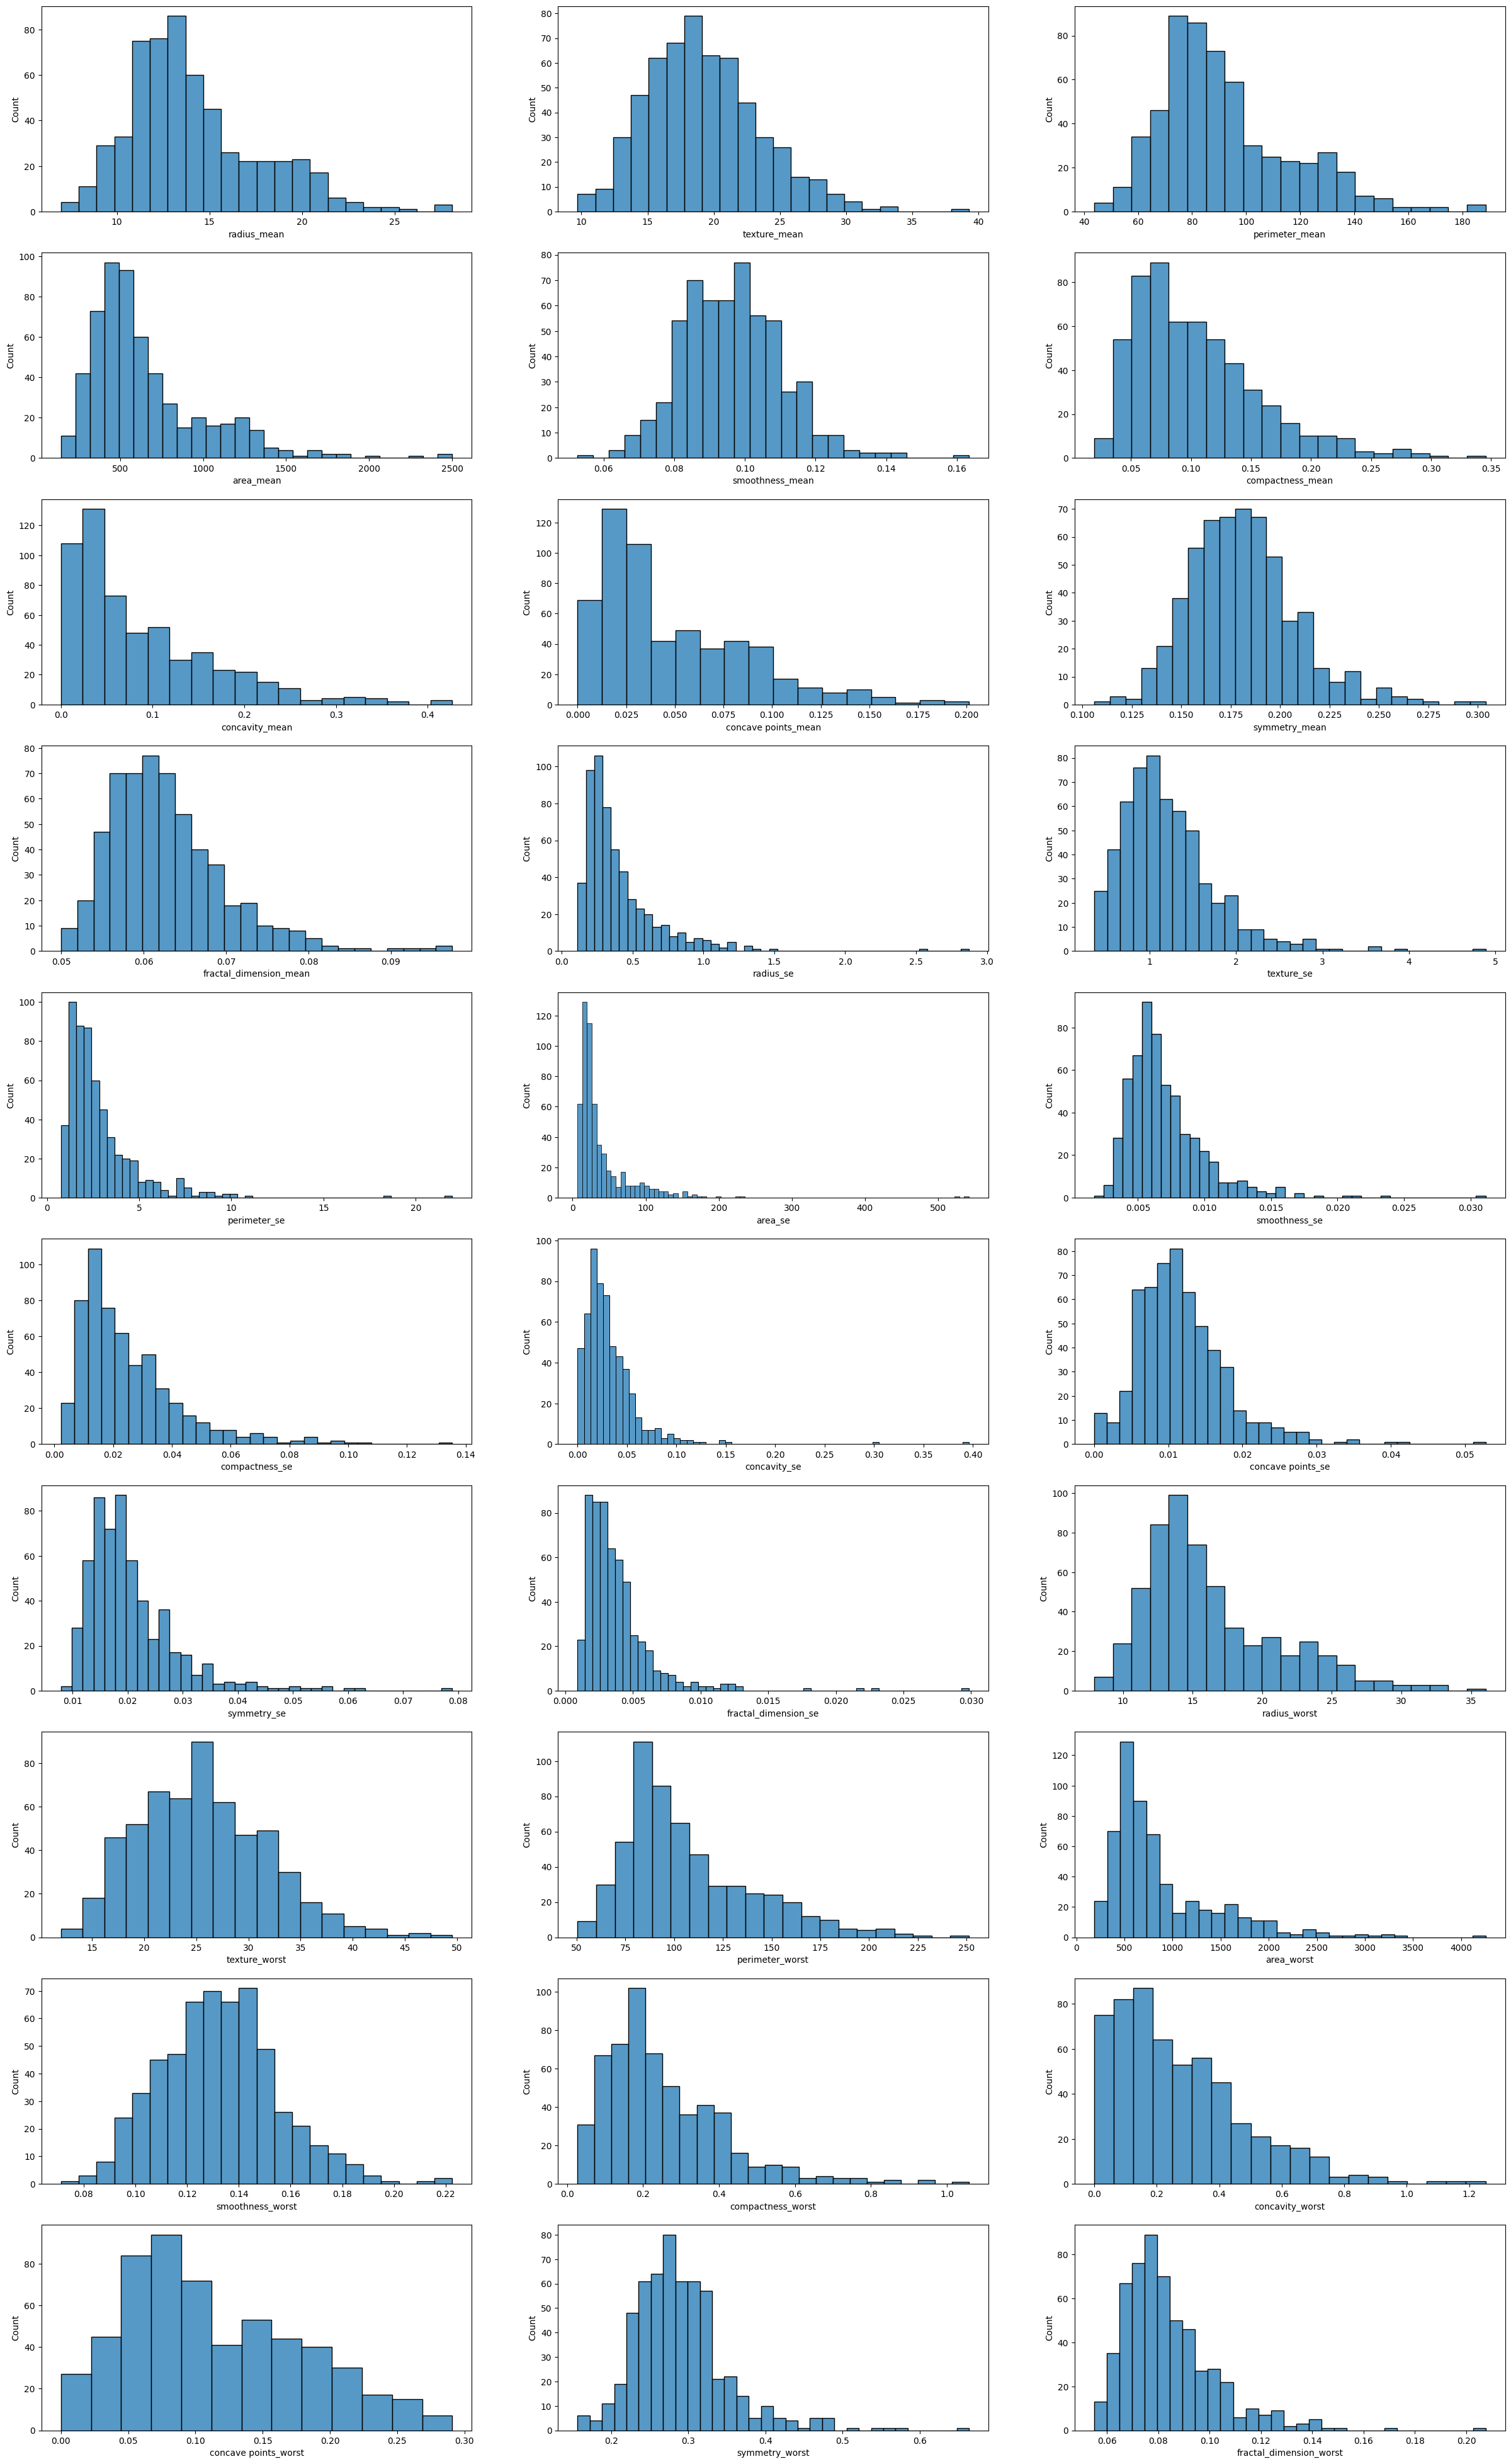

In [ ]:
plt.figure(figsize=(30,50))
for i , col in enumerate(df.columns[1:]):
    plt.subplot(10,3,i + 1)
    sns.histplot(data = df,x = col)

## Check outliers using Boxplot

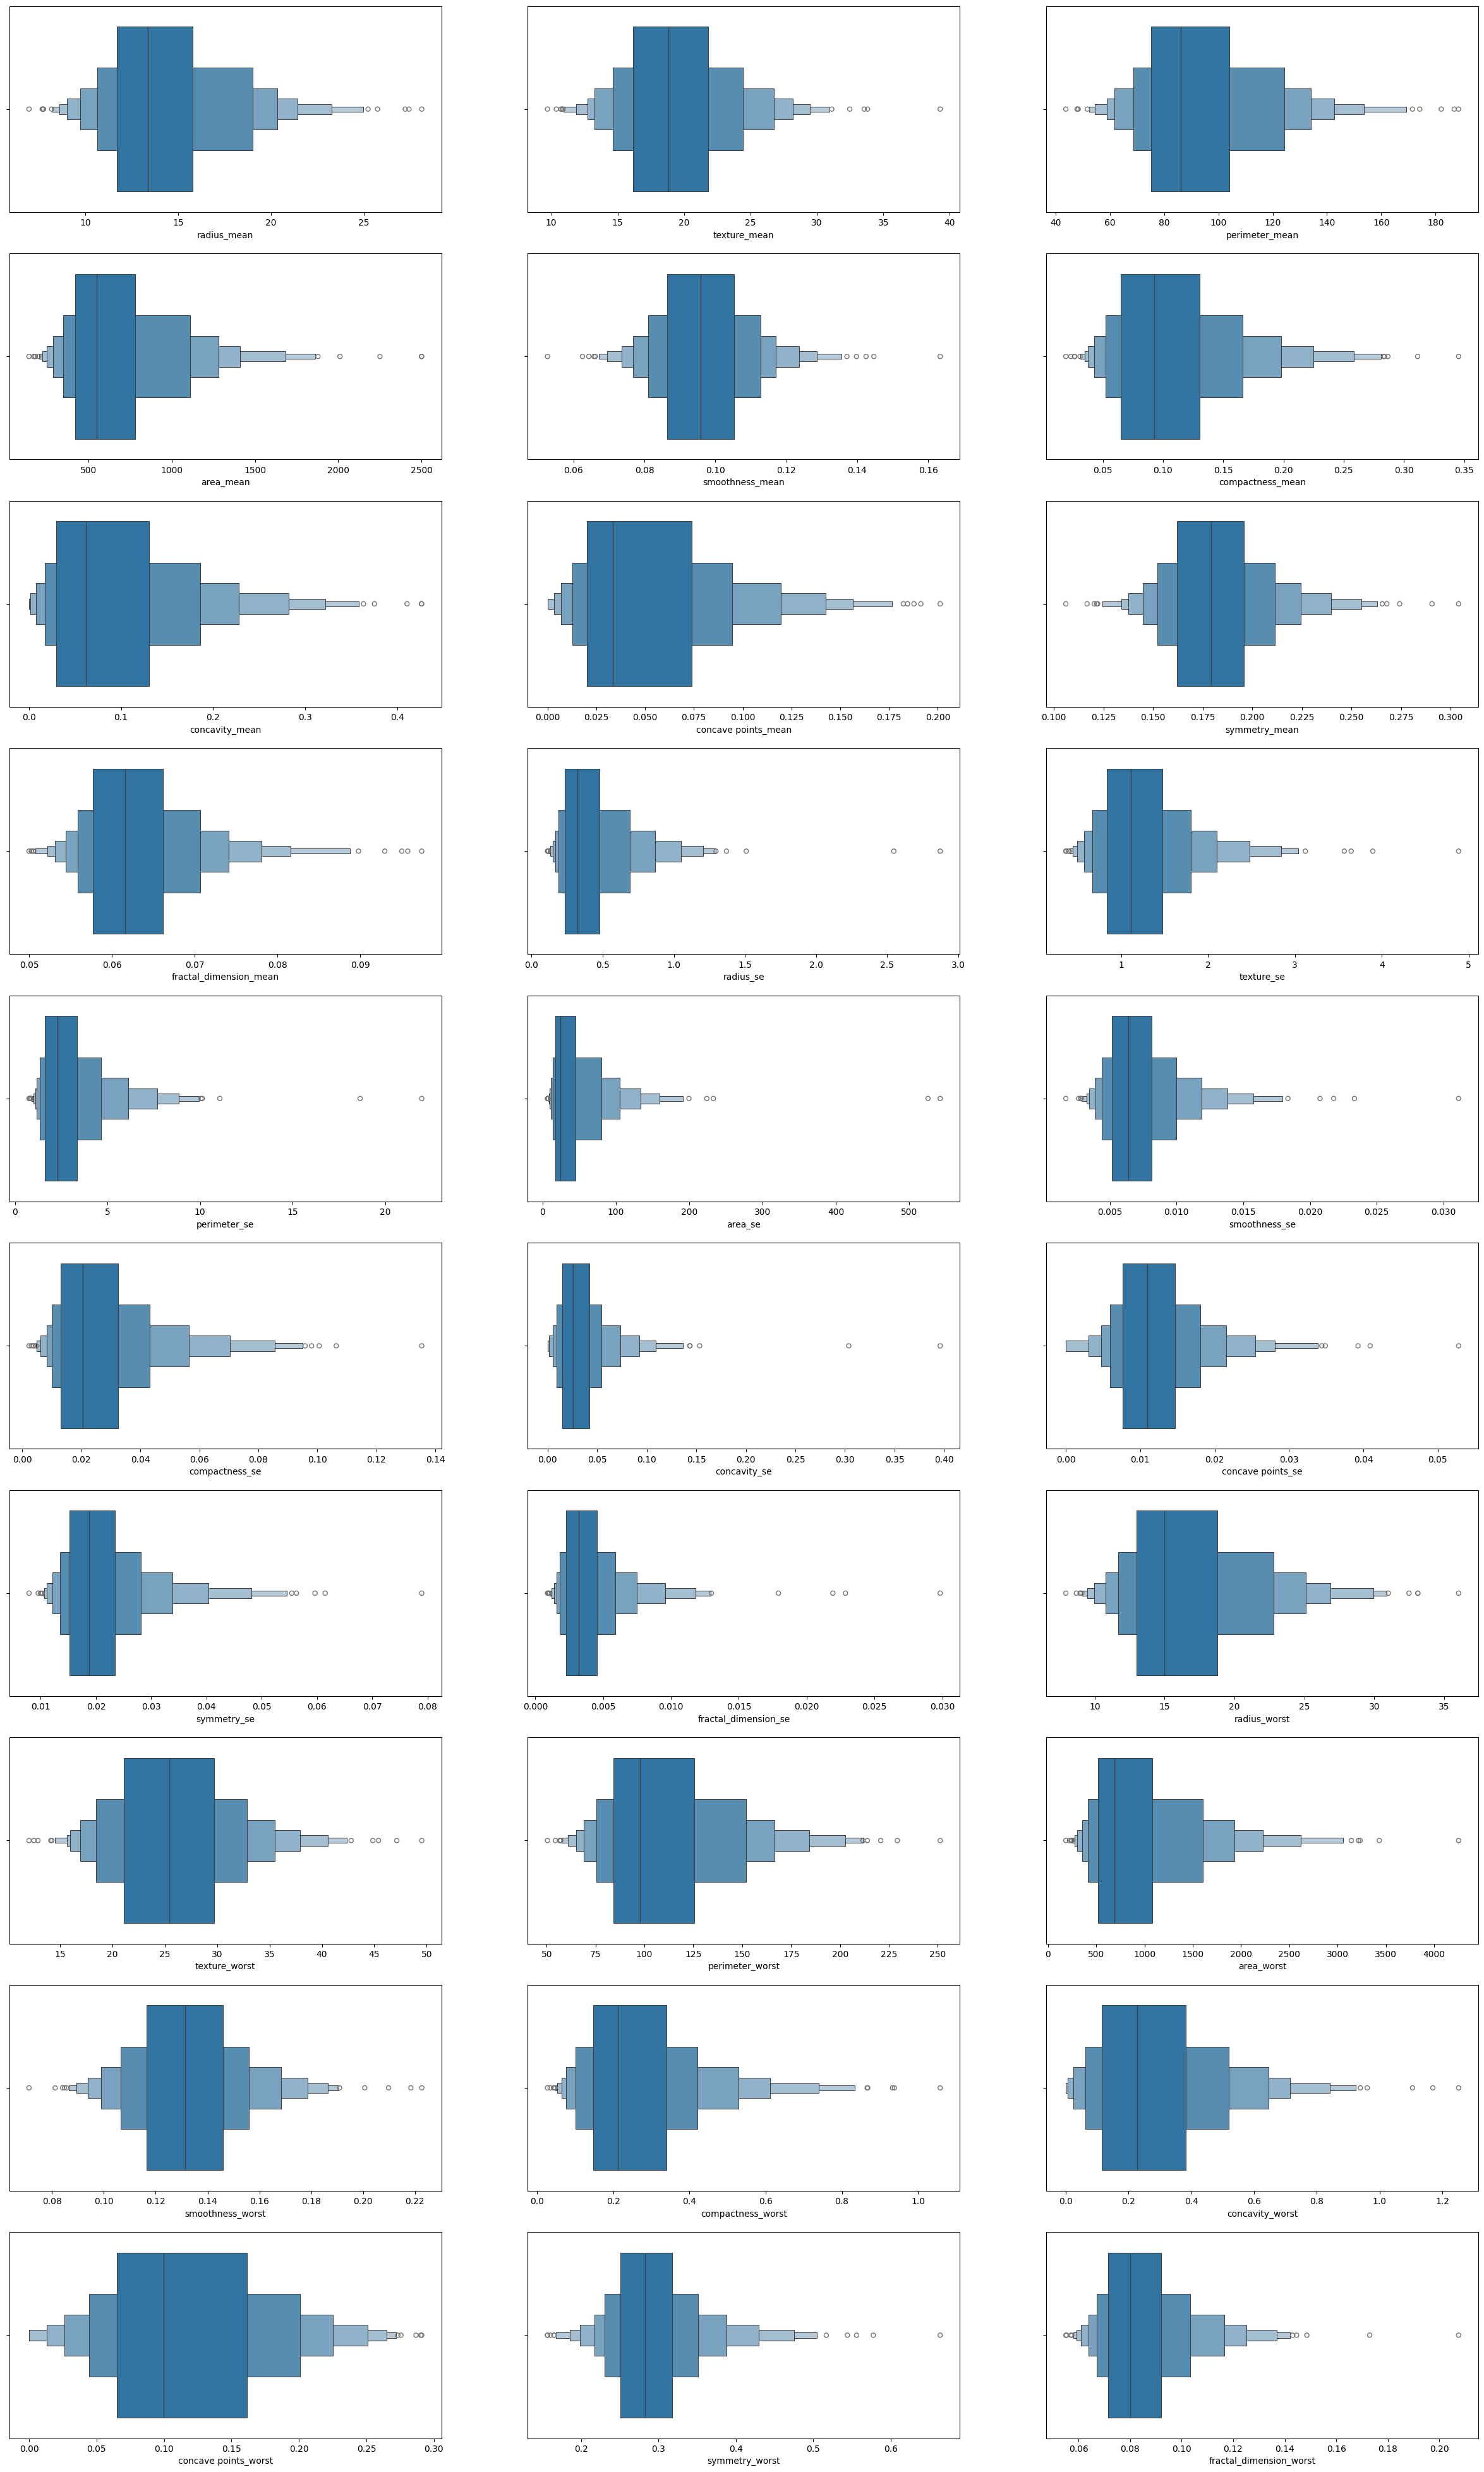

In [ ]:
plt.figure(figsize=(30,50))
for i , col in enumerate(df.columns[1:]):
    plt.subplot(10,3,i + 1)
    sns.boxenplot(data = df,x = col)
plt.show()

## Check relation Column concave points_worst to all Columns

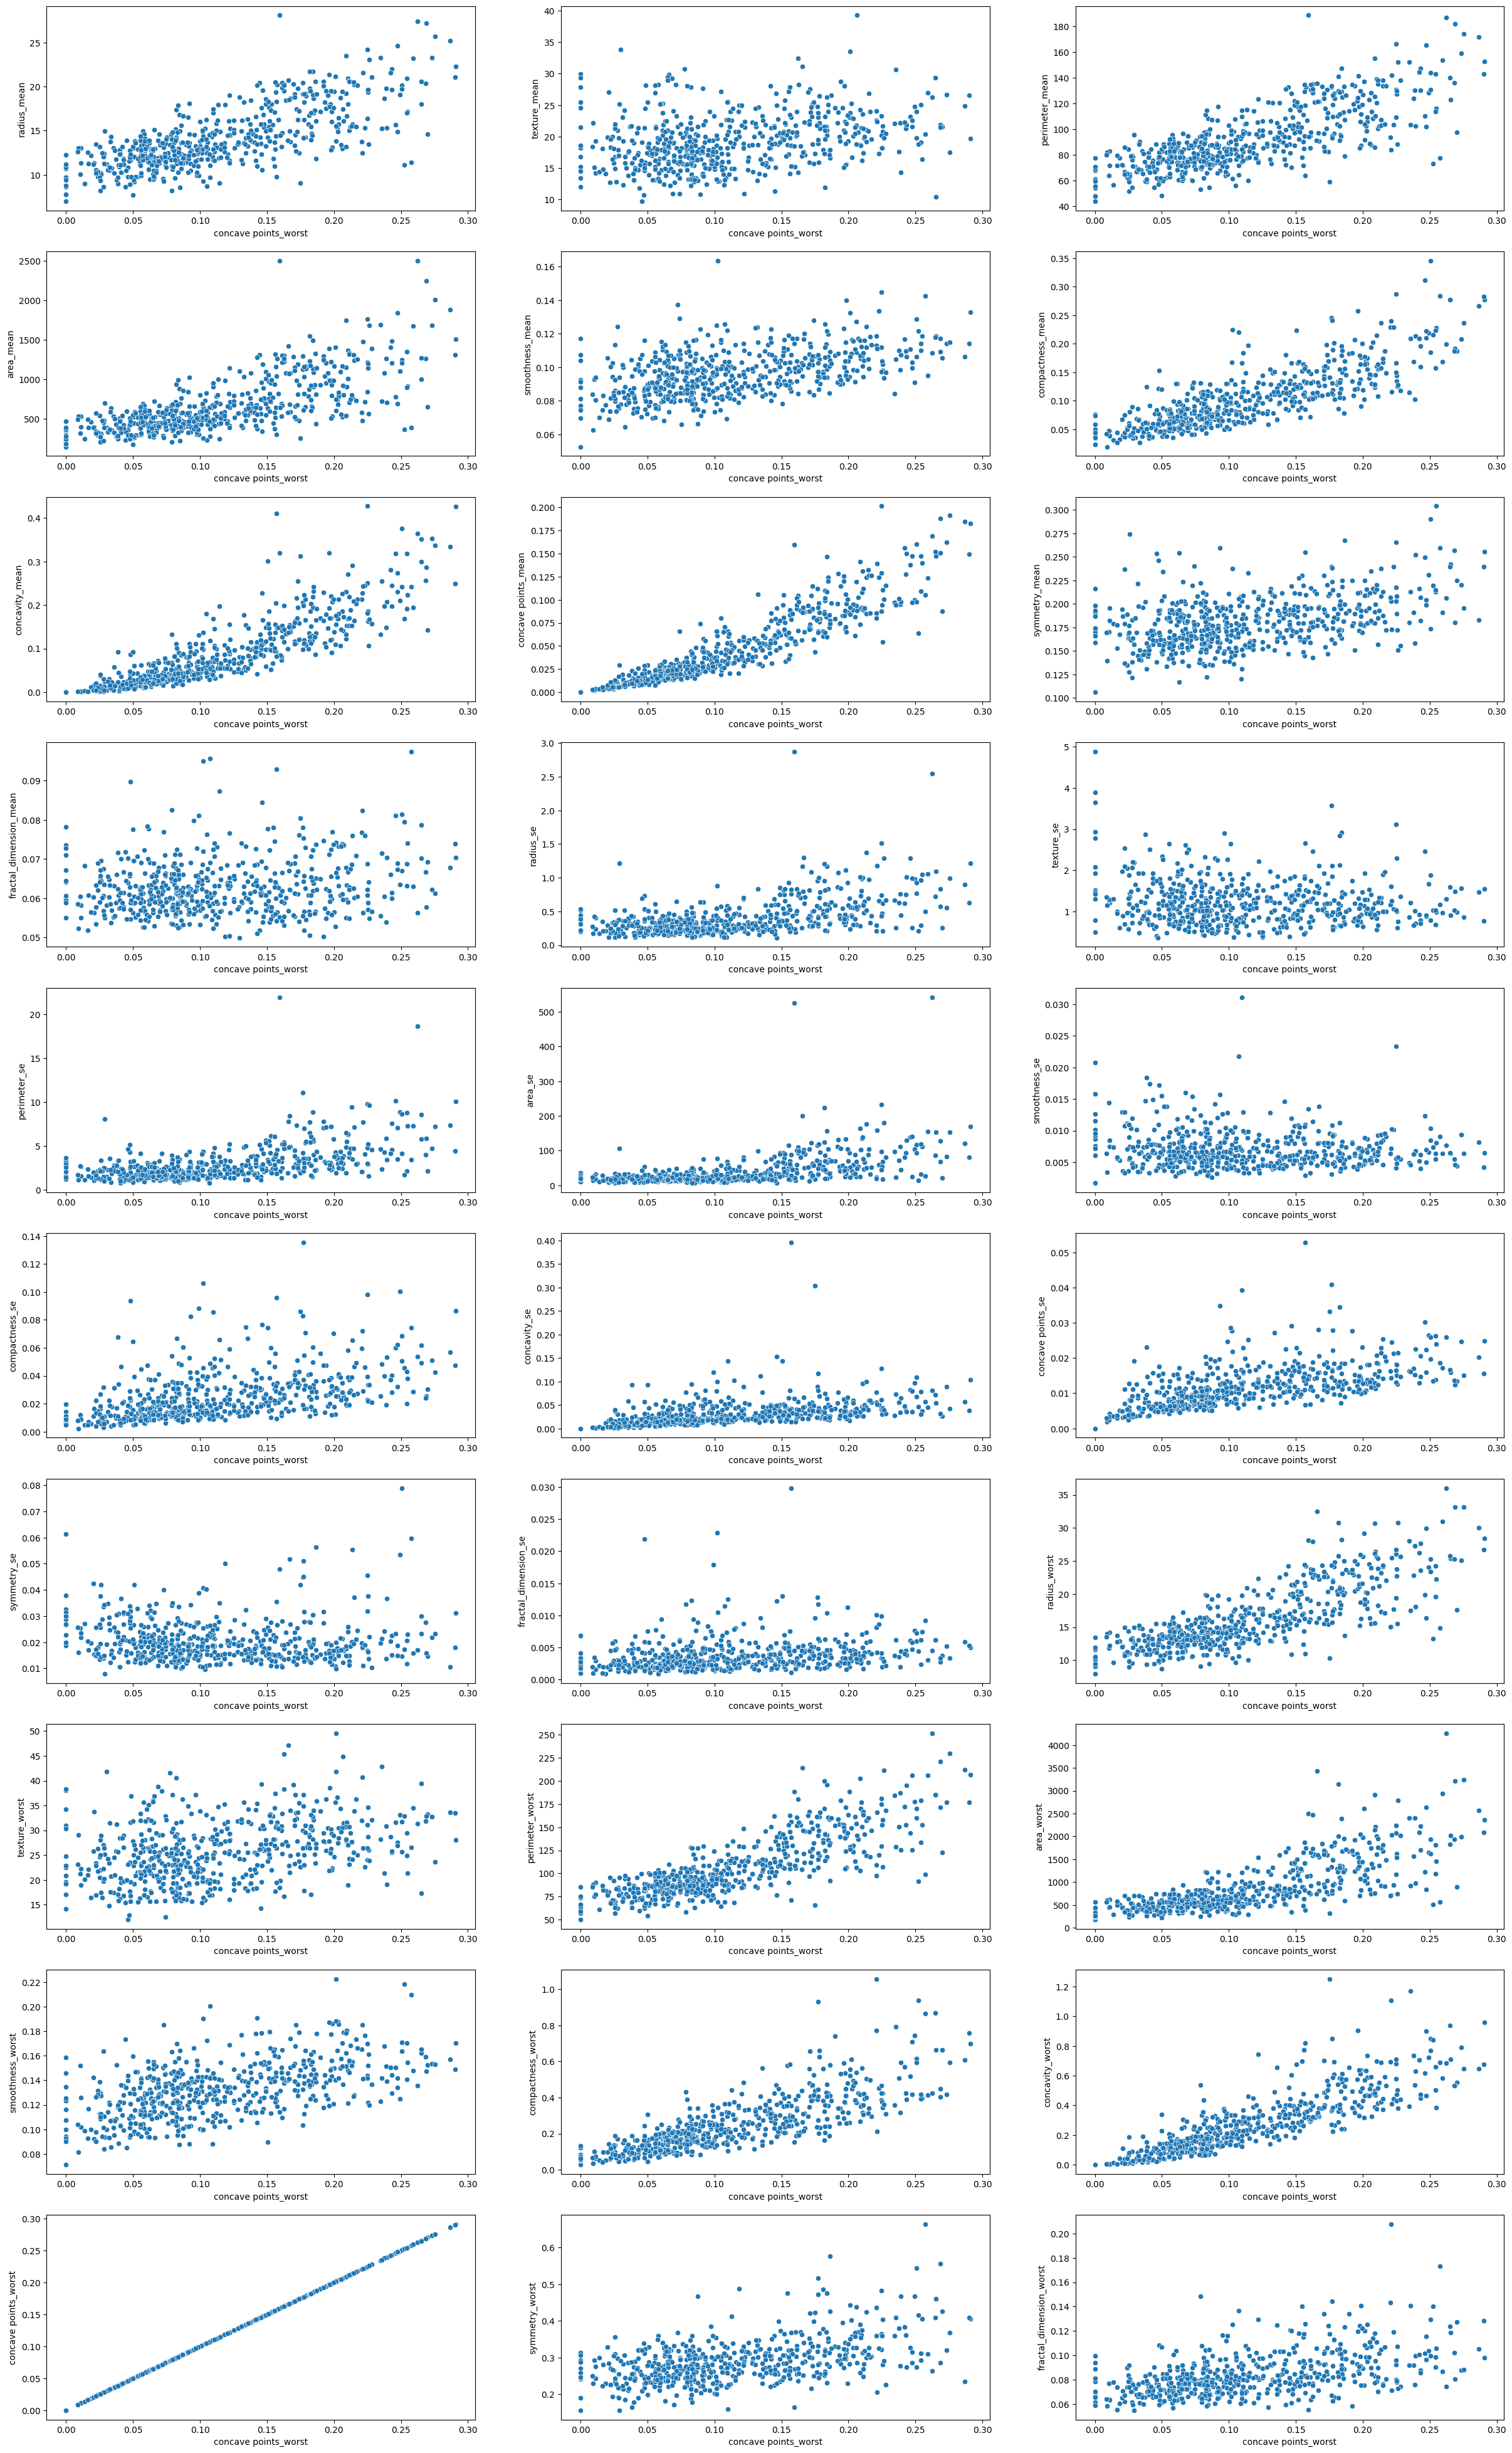

In [ ]:
plt.figure(figsize=(30,50))
for i , col in enumerate(df.columns[1:]):
    plt.subplot(10,3,i + 1)
    sns.scatterplot(data = df,x = 'concave points_worst' , y= col)

# Feature Engineering

In [14]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

## Replace Target to 0 & 1

In [15]:
df.diagnosis.replace({"M":0,"B":1},inplace = True)

<ipython-input-15-7abae10a8f3e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.diagnosis.replace({"M":0,"B":1},inplace = True)
<ipython-input-15-7abae10a8f3e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.diagnosis.replace({"M":0,"B":1},inplace = True)


In [16]:
corr_diagnosis = df.corr()['diagnosis']
corr_diagnosis


,diagnosis
diagnosis,1.000000
radius_mean,-0.730029
texture_mean,-0.415185
perimeter_mean,-0.742636
area_mean,-0.708984
smoothness_mean,-0.358560
compactness_mean,-0.596534
concavity_mean,-0.696360
concave points_mean,-0.776614
symmetry_mean,-0.330499


## Spliting to X & y

In [17]:
X=df.drop('diagnosis',axis= 1)
y=df.diagnosis

# Splitting Train & Test

In [18]:
from sklearn.model_selection import train_test_split
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

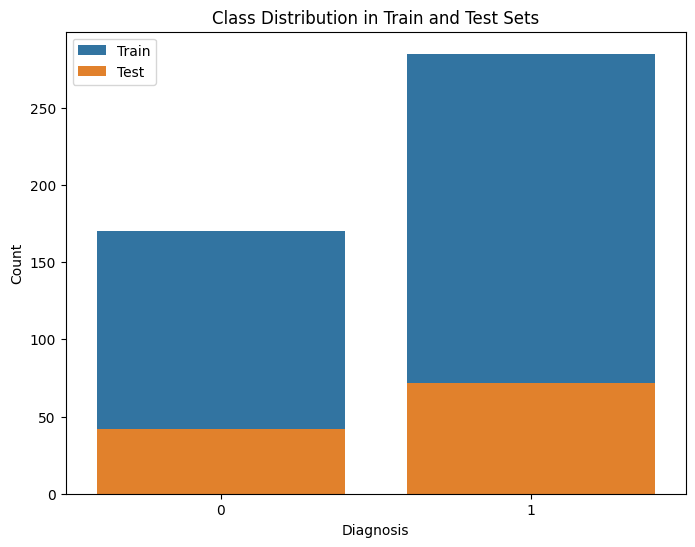

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train, label='Train')
sns.countplot(x=y_test, label='Test')
plt.legend()
plt.title('Class Distribution in Train and Test Sets')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()


## Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Machine Learning Models & Evaluation

In [23]:
# Dictionary of models with additional models
models = {
    'Logistic Regression': LogisticRegression(n_jobs=-1, random_state=0),
    'K Nearest Neighbors': KNeighborsClassifier(n_jobs=-1),
    'Support Vector Machine': SVC(random_state=0),
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(n_jobs=-1, random_state=0),
    'Extra Trees': ExtraTreesClassifier(n_jobs=-1, random_state=0),
    'Bagging': BaggingClassifier(n_jobs=-1, random_state=0),
    'Hist Gradient Boosting': HistGradientBoostingClassifier(random_state=0),
    'AdaBoosting': AdaBoostClassifier(random_state=0),
    'XGBoost': XGBClassifier(use_label_encoder=True, eval_metric='logloss', random_state=0),
    'LightGBM': LGBMClassifier(random_state=0,verbose=0),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=0,iterations=1000),
}

In [29]:
def train_ML_algorithms(X_train, X_test, y_train, y_test, models,Balanced=False, cv=5, test_size=0.2, random_state=42):
    """
    Split the data into training and test sets, train ML models using cross-validation on the training set
    (with SMOTE applied only within each fold), and record performance metrics for both training and test sets.
    Also captures probability predictions when available.
    """

    results = []
    models_name = []
    predictions_dict = {}

    for name, model in tqdm(models.items()):
        # Create a pipeline that applies SMOTE and then the classifier.
        if Balanced :
            pipeline = Pipeline([
                ('smote', SMOTE(random_state=random_state)),
                ('clf', model)
            ])
        else:
            pipeline = Pipeline([
                ('clf', model)
            ])

        # Set up stratified k-fold cross-validation on the training split.
        skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=random_state)

        # Compute cross-validation accuracy scores on the training data using the pipeline.
        cv_scores = cross_val_score(pipeline, X_train, y_train, cv=skf, scoring='f1_weighted')
        cv_accuracy = round(np.mean(cv_scores) * 100, 1)

        # Time the training process on training data using the pipeline.
        train_start_time = time.time()
        pipeline.fit(X_train, y_train)
        train_end_time = time.time()
        training_time = train_end_time - train_start_time

        # Make predictions on the training set.
        y_train_pred = pipeline.predict(X_train)
        # Make predictions on the test set and record prediction time.
        test_pred_start_time = time.time()
        y_test_pred = pipeline.predict(X_test)
        test_pred_end_time = time.time()
        test_pred_time = test_pred_end_time - test_pred_start_time

        # Initialize prediction dictionary.
        pred_dict = {
            "y_train": y_train,
            "y_test": y_test,
            "y_train_pred": y_train_pred,
            "y_test_pred": y_test_pred
        }

        # Try to get prediction probabilities if available.
        try:
            y_train_proba = pipeline.predict_proba(X_train)
            y_test_proba = pipeline.predict_proba(X_test)
            pred_dict["y_train_proba"] = y_train_proba
            pred_dict["y_test_proba"] = y_test_proba
        except (AttributeError, NotImplementedError):
            # Some models don't have predict_proba.
            pass

        # Save predictions for both training and test sets.
        predictions_dict[name] = pred_dict

        # Calculate performance metrics.
        accuracy_train = round(accuracy_score(y_train, y_train_pred)* 100, 1)
        precision_train = round(precision_score(y_train, y_train_pred, average='weighted')* 100, 1)
        recall_train = round(recall_score(y_train, y_train_pred, average='weighted')* 100, 1)
        f1_train = round(f1_score(y_train, y_train_pred, average='weighted')* 100, 1)

        accuracy_test = round(accuracy_score(y_test, y_test_pred)* 100, 3)
        precision_test = round(precision_score(y_test, y_test_pred, average='weighted')* 100, 1)
        recall_test = round(recall_score(y_test, y_test_pred, average='weighted')* 100, 1)
        f1_test = round(f1_score(y_test, y_test_pred, average='weighted')* 100, 1)

        models_name.append(name)
        results.append([
            cv_accuracy,
            accuracy_train, accuracy_test,
            precision_train, precision_test,
            recall_train, recall_test,
            f1_train, f1_test,
            training_time, test_pred_time
        ])

        print(f"\n{name}: CV F1_Score = {cv_accuracy:.2f}%, Train Acc = {accuracy_train:.2f}%, Test Acc = {accuracy_test:.2f}%")

    # Create a DataFrame to summarize model performance.
    Model_accuracy = pd.DataFrame(
        results,
        index=models_name,
        columns=[
            'CV F1_Score',
            'Train Accuracy', 'Test Accuracy',
            'Train Precision', 'Test Precision',
            'Train Recall', 'Test Recall',
            'Train F1 Score', 'Test F1 Score',
            'Training Time (s)', 'Test Prediction Time (s)'
        ]
    )

    return Model_accuracy, predictions_dict

In [25]:
def calculate_confidence_metrics(predictions_dict, threshold=0.7):
    """
    Calculate confidence metrics for each model based on prediction probabilities.
    Handles models that don't support predict_proba.

    Parameters:
        predictions_dict (dict): Dictionary containing predictions and probabilities
        threshold (float): Confidence threshold for high-confidence predictions

    Returns:
        pd.DataFrame: DataFrame with confidence metrics for each model
    """
    confidence_results = {}

    for model_name, pred_data in predictions_dict.items():
        metrics = {}

        # Check if probability data is available
        if "y_train_proba" in pred_data and "y_test_proba" in pred_data:
            # Training set confidence metrics
            train_proba = pred_data["y_train_proba"]
            train_max_proba = np.max(train_proba, axis=1)

            metrics["train_avg_confidence"] = round(np.mean(train_max_proba), 3)
            metrics["train_median_confidence"] = round(np.median(train_max_proba), 3)
            metrics["train_high_confidence_ratio"] = round(np.mean(train_max_proba >= threshold), 3)

            # Calculate confidence-weighted accuracy for training
            y_train = pred_data["y_train"]
            y_train_pred = pred_data["y_train_pred"]
            correct_train = (y_train == y_train_pred)
            metrics["train_confidence_weighted_accuracy"] = round(np.sum(correct_train * train_max_proba) / np.sum(train_max_proba), 3)

            # Test set confidence metrics
            test_proba = pred_data["y_test_proba"]
            test_max_proba = np.max(test_proba, axis=1)

            metrics["test_avg_confidence"] = round(np.mean(test_max_proba), 3)
            metrics["test_median_confidence"] = round(np.median(test_max_proba), 3)
            metrics["test_high_confidence_ratio"] = round(np.mean(test_max_proba >= threshold), 3)

            # Calculate confidence-weighted accuracy for test
            y_test = pred_data["y_test"]
            y_test_pred = pred_data["y_test_pred"]
            correct_test = (y_test == y_test_pred)
            metrics["test_confidence_weighted_accuracy"] = round(np.sum(correct_test * test_max_proba) / np.sum(test_max_proba), 3)
        else:
            # For models without predict_proba, use placeholder values
            metrics["train_avg_confidence"] = np.nan
            metrics["train_median_confidence"] = np.nan
            metrics["train_high_confidence_ratio"] = np.nan
            metrics["train_confidence_weighted_accuracy"] = np.nan
            metrics["test_avg_confidence"] = np.nan
            metrics["test_median_confidence"] = np.nan
            metrics["test_high_confidence_ratio"] = np.nan
            metrics["test_confidence_weighted_accuracy"] = np.nan

        confidence_results[model_name] = metrics

    # Convert to DataFrame
    conf_df = pd.DataFrame.from_dict(confidence_results, orient='index')

    return conf_df

In [26]:
def plot_models_accuracy_scores(Model_accuracy):
    """
    Enhanced visualization of model performance metrics with improved visual layout.

    Parameters:
        Model_accuracy (pd.DataFrame): DataFrame containing metrics for each model.

    Returns:
        None
    """

    # ============== Time Performance Visualization ==============
    fig, ax = plt.subplots(figsize=(12, 8))
    time_metrics = ['Training Time (s)', 'Test Prediction Time (s)']
    time_data = Model_accuracy[time_metrics]

    # Plot with logarithmic scale for better visibility
    time_data.plot(kind='bar', ax=ax, logy=True, width=0.8)

    # Customize plot
    plt.title('Model Computational Efficiency (Log Scale)', fontsize=14)
    plt.xlabel('Models', fontsize=12)
    plt.ylabel('Seconds (log scale)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Time Metrics')

    # Value annotations
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', label_type='edge',
                    padding=3, fontsize=8, rotation=90)

    plt.tight_layout()
    plt.show()

    # ============== Performance Metrics Comparison ==============
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    fig, axs = plt.subplots(2, 2, figsize=(18, 12))

    for idx, metric in enumerate(metrics):
        ax = axs[idx//2, idx%2]
        sorted_models = Model_accuracy.sort_values(f'Test {metric}', ascending=False)

        # Horizontal position
        y_pos = np.arange(len(sorted_models))
        bar_height = 0.4

        # Plot train/test comparison
        train_bars = ax.barh(y_pos - bar_height/2, sorted_models[f'Train {metric}'],
                            height=bar_height, color='#1f77b4', label='Train')
        test_bars = ax.barh(y_pos + bar_height/2, sorted_models[f'Test {metric}'],
                           height=bar_height, color='#ff7f0e', label='Test')

        # Customize subplot
        ax.set_title(f'{metric} Comparison', fontsize=13)
        ax.set_yticks(y_pos)
        ax.set_yticklabels(sorted_models.index)
        ax.set_xlim(0, 105)
        ax.grid(axis='x', alpha=0.4)

        # Annotate values
        for bars in [train_bars, test_bars]:
            for bar in bars:
                width = bar.get_width()
                ax.text(width + 1, bar.get_y() + bar.get_height()/2,
                       f'{width:.1f}', va='center', fontsize=9)

        if idx == 0:  # Only show legend once
            ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    plt.suptitle('Model Performance Metrics Comparison', y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

    # ============== Compact Metric Overview ==============
    plt.figure(figsize=(14, 8))

    # Prepare data for combined metric visualization
    test_metrics = Model_accuracy[['Test Accuracy', 'Test Precision',
                                  'Test Recall', 'Test F1 Score']]
    train_metrics = Model_accuracy[['Train Accuracy', 'Train Precision',
                                   'Train Recall', 'Train F1 Score']]

    # Sort by test accuracy
    sorted_models = test_metrics.sort_values('Test Accuracy', ascending=False)

    # Plot all metrics in compact view
    x_pos = np.arange(len(sorted_models))
    for i, col in enumerate(test_metrics.columns):
        plt.plot(x_pos, sorted_models[col],
                marker='o', linestyle='--',
                label=col.replace('Test ', ''))

    plt.title('Combined Test Metric Trends', fontsize=14)
    plt.xlabel('Models (sorted by test accuracy)')
    plt.ylabel('Score')
    plt.xticks(x_pos, sorted_models.index, rotation=45, ha='right')
    plt.ylim(0, 102)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(alpha=0.2)
    plt.tight_layout()
    plt.show()


In [27]:
def display_metrics(predictions_dict, class_names, best_model_name=None):
    models_to_evaluate = [best_model_name] if best_model_name else predictions_dict.keys()
    num_classes = len(class_names)

    for model_name in models_to_evaluate:
        preds = predictions_dict[model_name]
        print(f"\n=== Metrics for Model: {model_name} ===")

        for split in ["train", "test"]:
            y_true = preds[f"y_{split}"]
            y_pred = preds[f"y_{split}_pred"]
            y_proba_key = f"y_{split}_proba"
            has_proba = y_proba_key in preds

            print(f"\n{split.capitalize()} Metrics:")
            print("Classification Report:")
            print(classification_report(y_true, y_pred, target_names=class_names))

            fig, axes = plt.subplots(1, 3, figsize=(20, 5))

            # Raw Confusion Matrix
            cm = confusion_matrix(y_true, y_pred)
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[0],
                        xticklabels=class_names, yticklabels=class_names)
            axes[0].set_title(f"{split.capitalize()} Confusion Matrix")
            axes[0].set_xlabel("Predicted")
            axes[0].set_ylabel("True")

            # Normalized Confusion Matrix
            cm_norm = confusion_matrix(y_true, y_pred, normalize="true")
            sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues", ax=axes[1],
                        xticklabels=class_names, yticklabels=class_names)
            axes[1].set_title(f"{split.capitalize()} Confusion Matrix (Normalized)")
            axes[1].set_xlabel("Predicted")
            axes[1].set_ylabel("True")

            # ROC Curve
            ax_roc = axes[2]
            if has_proba:
                y_score = preds[y_proba_key]
                try:
                    if num_classes == 2:
                        fpr, tpr, _ = roc_curve(y_true, y_score[:, 1])
                        auc_score = roc_auc_score(y_true, y_score[:, 1])
                        ax_roc.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
                        ax_roc.plot([0, 1], [0, 1], "k--")
                    else:
                        # Multi-class
                        y_true_bin = label_binarize(y_true, classes=range(num_classes))
                        auc_score = roc_auc_score(y_true_bin, y_score, average="macro", multi_class="ovr")
                        for i in range(num_classes):
                            fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
                            ax_roc.plot(fpr, tpr, label=f"{class_names[i]} (AUC={roc_auc_score(y_true_bin[:, i], y_score[:, i]):.2f})")
                        ax_roc.plot([0, 1], [0, 1], "k--")

                    ax_roc.set_title(f"{split.capitalize()} ROC Curve (AUC = {auc_score:.2f})")
                    ax_roc.set_xlabel("False Positive Rate")
                    ax_roc.set_ylabel("True Positive Rate")
                    ax_roc.legend()
                    ax_roc.grid()
                except Exception as e:
                    ax_roc.text(0.5, 0.5, f"Error computing ROC: {e}", ha='center', va='center')
                    ax_roc.axis("off")
            else:
                ax_roc.text(0.5, 0.5, f"No probability scores for {split}", ha='center', va='center')
                ax_roc.axis("off")

            plt.tight_layout()
            plt.show()


# Train ML Models

In [36]:
Model_accuracy, predictions_dict = train_ML_algorithms(X_train, X_test, y_train, y_test, models,Balanced=False)

  8%|▊         | 1/12 [00:00<00:02,  4.30it/s]


Logistic Regression: CV F1_Score = 97.80%, Train Acc = 98.90%, Test Acc = 98.25%


 17%|█▋        | 2/12 [00:00<00:02,  4.37it/s]


K Nearest Neighbors: CV F1_Score = 96.00%, Train Acc = 97.40%, Test Acc = 95.61%


 25%|██▌       | 3/12 [00:00<00:02,  3.66it/s]


Support Vector Machine: CV F1_Score = 96.70%, Train Acc = 98.20%, Test Acc = 98.25%


 33%|███▎      | 4/12 [00:01<00:02,  3.54it/s]


Decision Tree: CV F1_Score = 92.30%, Train Acc = 100.00%, Test Acc = 91.23%


 42%|████▏     | 5/12 [00:03<00:07,  1.01s/it]


Random Forest: CV F1_Score = 95.80%, Train Acc = 100.00%, Test Acc = 95.61%


 50%|█████     | 6/12 [00:05<00:07,  1.32s/it]


Extra Trees: CV F1_Score = 97.40%, Train Acc = 100.00%, Test Acc = 95.61%


 58%|█████▊    | 7/12 [00:06<00:06,  1.34s/it]


Bagging: CV F1_Score = 94.10%, Train Acc = 99.80%, Test Acc = 92.98%


 67%|██████▋   | 8/12 [00:08<00:06,  1.55s/it]


Hist Gradient Boosting: CV F1_Score = 96.90%, Train Acc = 100.00%, Test Acc = 97.37%


 75%|███████▌  | 9/12 [00:09<00:04,  1.47s/it]


AdaBoosting: CV F1_Score = 96.50%, Train Acc = 100.00%, Test Acc = 95.61%


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:32:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:32:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:32:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:32:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:32:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


XGBoost: CV F1_Score = 96.30%, Train Acc = 100.00%, Test Acc = 94.74%
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

100%|██████████| 12/12 [01:07<00:00,  5.64s/it]


CatBoost: CV F1_Score = 97.40%, Train Acc = 100.00%, Test Acc = 95.61%


## Sort models by Corss Validation F1 Score

In [37]:
Model_accuracy.sort_values(by='CV F1_Score',ascending=False,inplace=True)
Model_accuracy

,CV F1_Score,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score,Training Time (s),Test Prediction Time (s)
Logistic Regression,97.8,98.9,98.246,98.9,98.2,98.9,98.2,98.9,98.2,0.023637,0.000803
Extra Trees,97.4,100.0,95.614,100.0,95.6,100.0,95.6,100.0,95.6,0.310005,0.092399
CatBoost,97.4,100.0,95.614,100.0,95.7,100.0,95.6,100.0,95.6,10.228607,0.001441
Hist Gradient Boosting,96.9,100.0,97.368,100.0,97.5,100.0,97.4,100.0,97.3,0.388170,0.002780
Support Vector Machine,96.7,98.2,98.246,98.2,98.2,98.2,98.2,98.2,98.2,0.019640,0.008299
AdaBoosting,96.5,100.0,95.614,100.0,95.7,100.0,95.6,100.0,95.6,0.208140,0.010891
LightGBM,96.5,100.0,95.614,100.0,95.7,100.0,95.6,100.0,95.6,0.166642,0.002950
XGBoost,96.3,100.0,94.737,100.0,94.7,100.0,94.7,100.0,94.7,0.076742,0.001178
K Nearest Neighbors,96.0,97.4,95.614,97.4,95.6,97.4,95.6,97.4,95.6,0.001728,0.019624
Random Forest,95.8,100.0,95.614,100.0,95.6,100.0,95.6,100.0,95.6,0.251713,0.036612


In [38]:
# Calculate the overall average for each model across Train and Test
Model_accuracy["Overall Accuracy"] = Model_accuracy[["Train Accuracy", "Test Accuracy"]].mean(axis=1).round(1)
Model_accuracy["Overall Precision"] = Model_accuracy[["Train Precision", "Test Precision"]].mean(axis=1).round(1)
Model_accuracy["Overall Recall"] = Model_accuracy[["Train Recall", "Test Recall"]].mean(axis=1).round(1)
Model_accuracy["Overall F1 Score"] = Model_accuracy[["Train F1 Score", "Test F1 Score"]].mean(axis=1).round(1)

# Display the updated DataFrame with overall metrics
model_overall = Model_accuracy[["CV F1_Score","Overall Accuracy", "Overall Precision", "Overall Recall", "Overall F1 Score"]]
model_overall

,CV F1_Score,Overall Accuracy,Overall Precision,Overall Recall,Overall F1 Score
Logistic Regression,97.8,98.6,98.6,98.6,98.6
Extra Trees,97.4,97.8,97.8,97.8,97.8
CatBoost,97.4,97.8,97.8,97.8,97.8
Hist Gradient Boosting,96.9,98.7,98.8,98.7,98.6
Support Vector Machine,96.7,98.2,98.2,98.2,98.2
AdaBoosting,96.5,97.8,97.8,97.8,97.8
LightGBM,96.5,97.8,97.8,97.8,97.8
XGBoost,96.3,97.4,97.4,97.4,97.4
K Nearest Neighbors,96.0,96.5,96.5,96.5,96.5
Random Forest,95.8,97.8,97.8,97.8,97.8


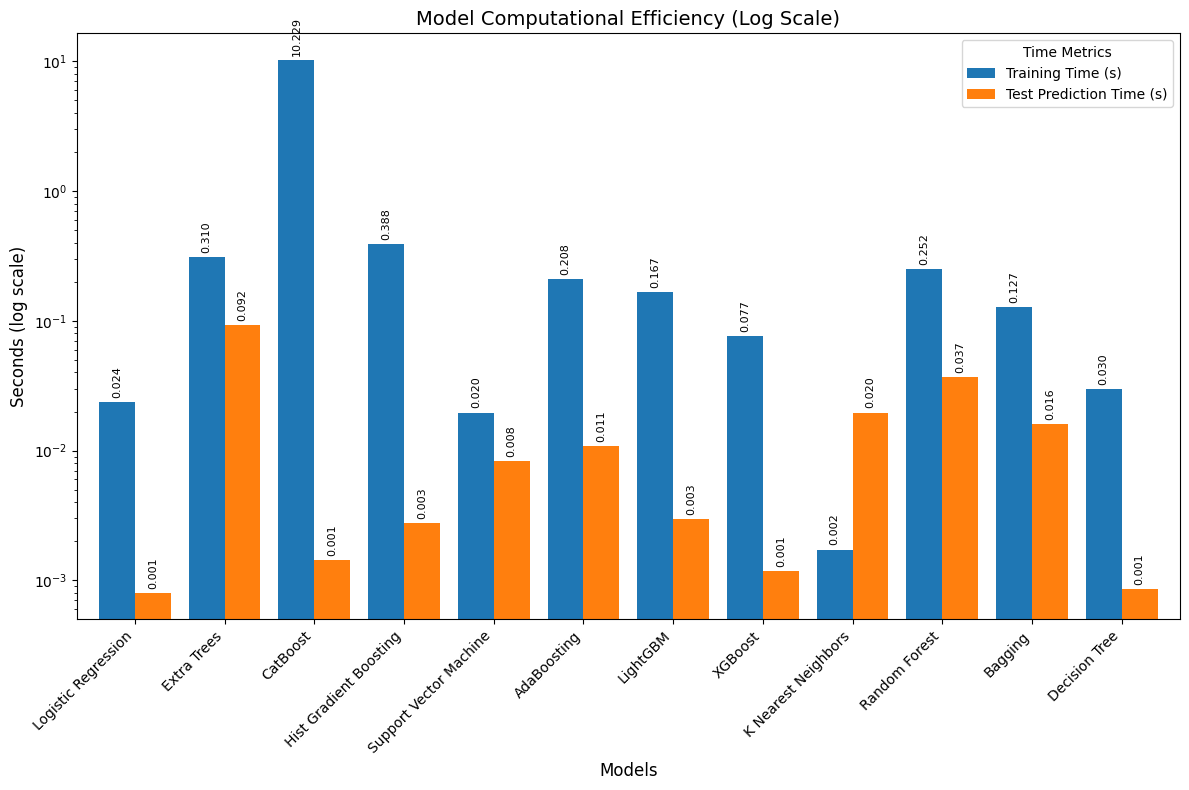

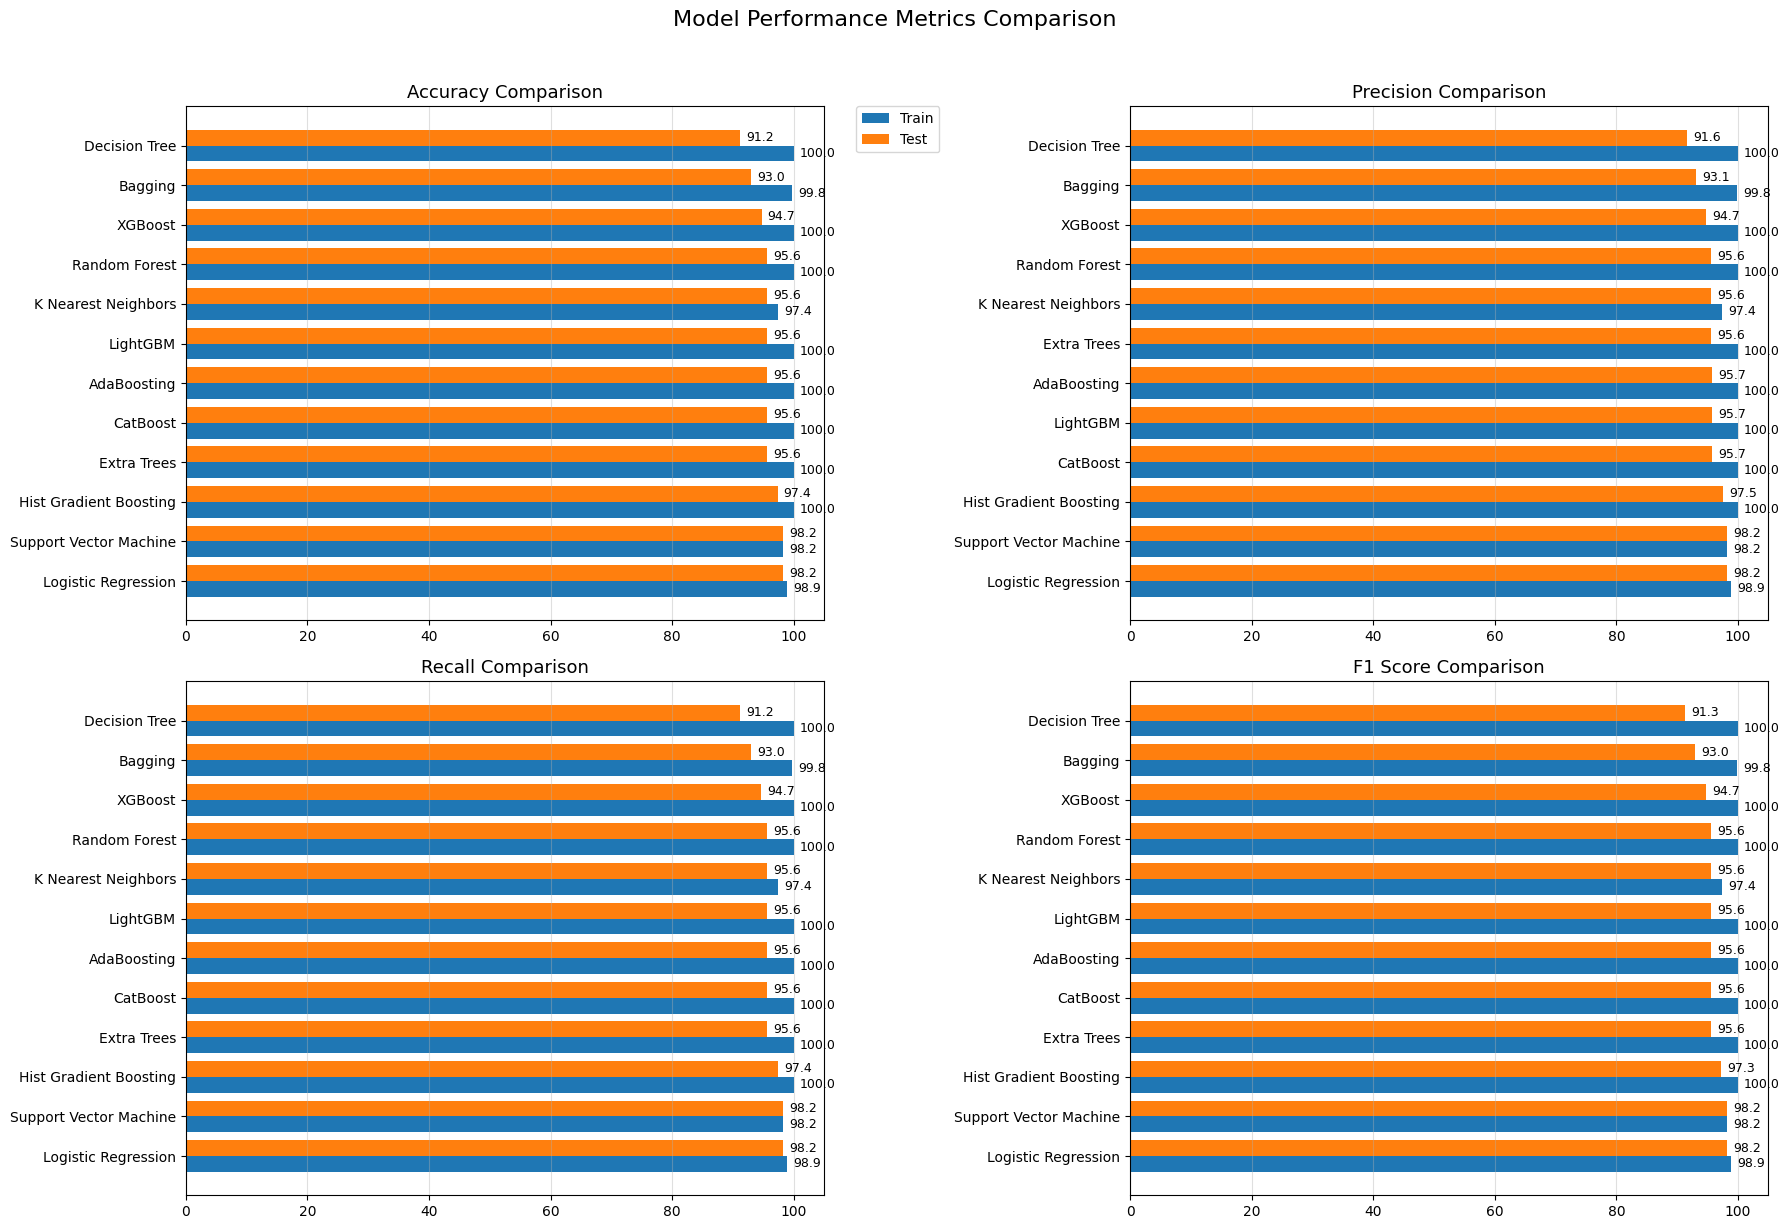

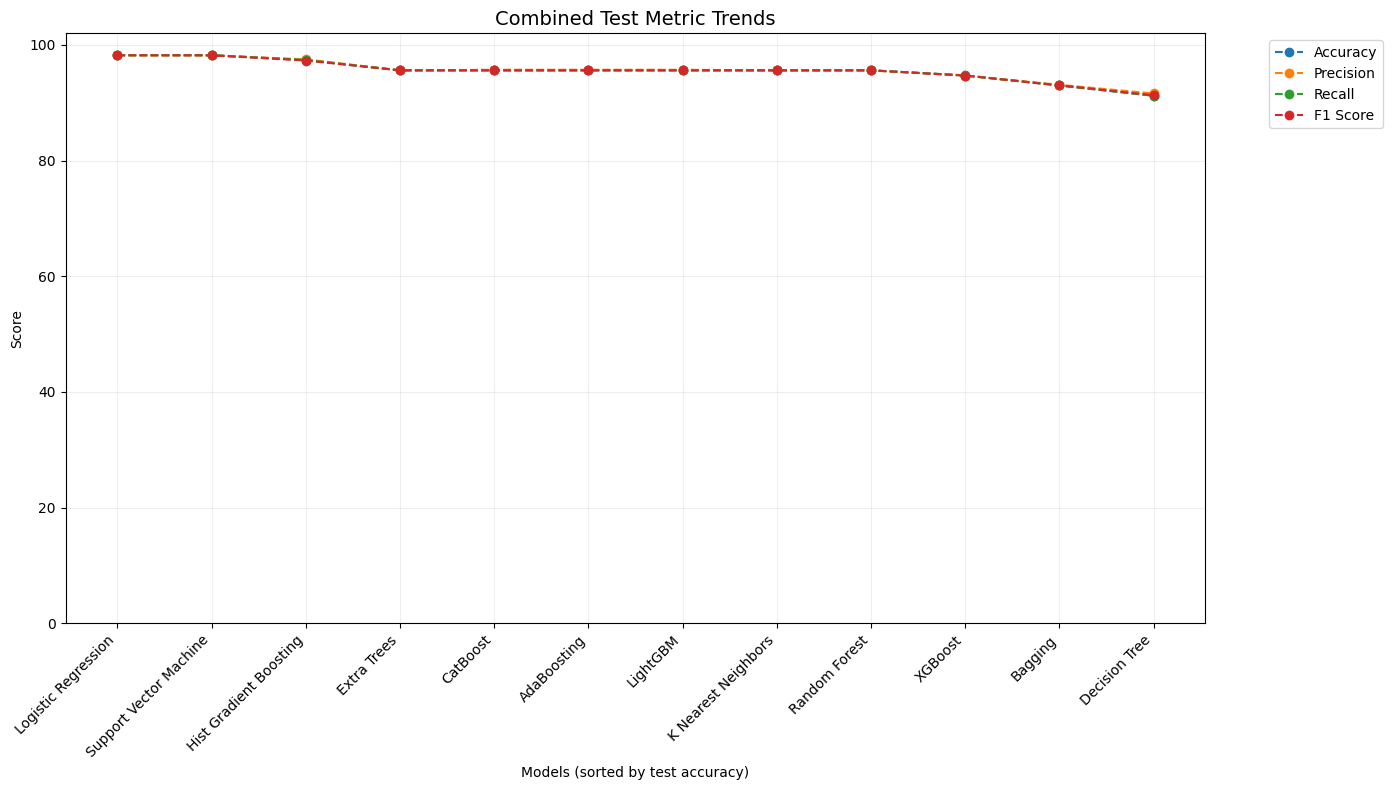

In [39]:
plot_models_accuracy_scores(Model_accuracy)


=== Metrics for Model: Logistic Regression ===

Train Metrics:
Classification Report:
              precision    recall  f1-score   support

           M       0.99      0.98      0.99       170
           B       0.99      1.00      0.99       285

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455



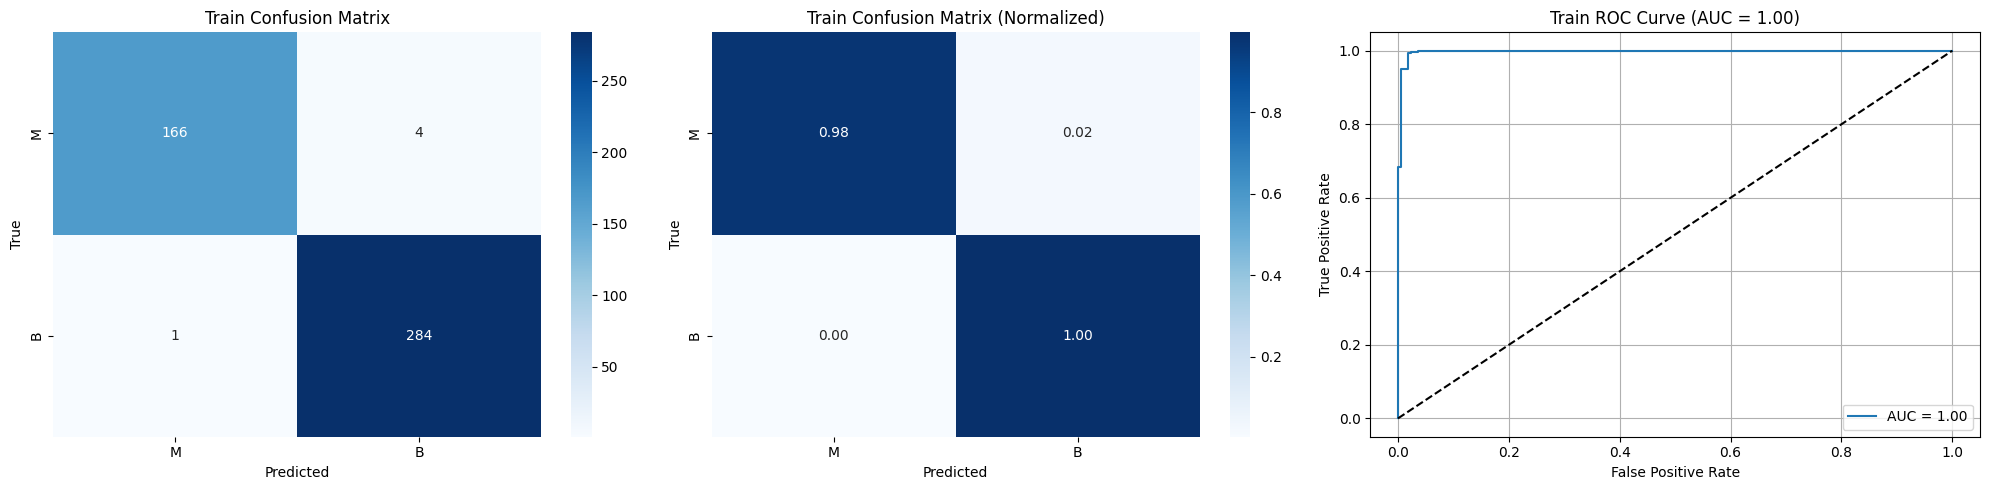


Test Metrics:
Classification Report:
              precision    recall  f1-score   support

           M       0.98      0.98      0.98        42
           B       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



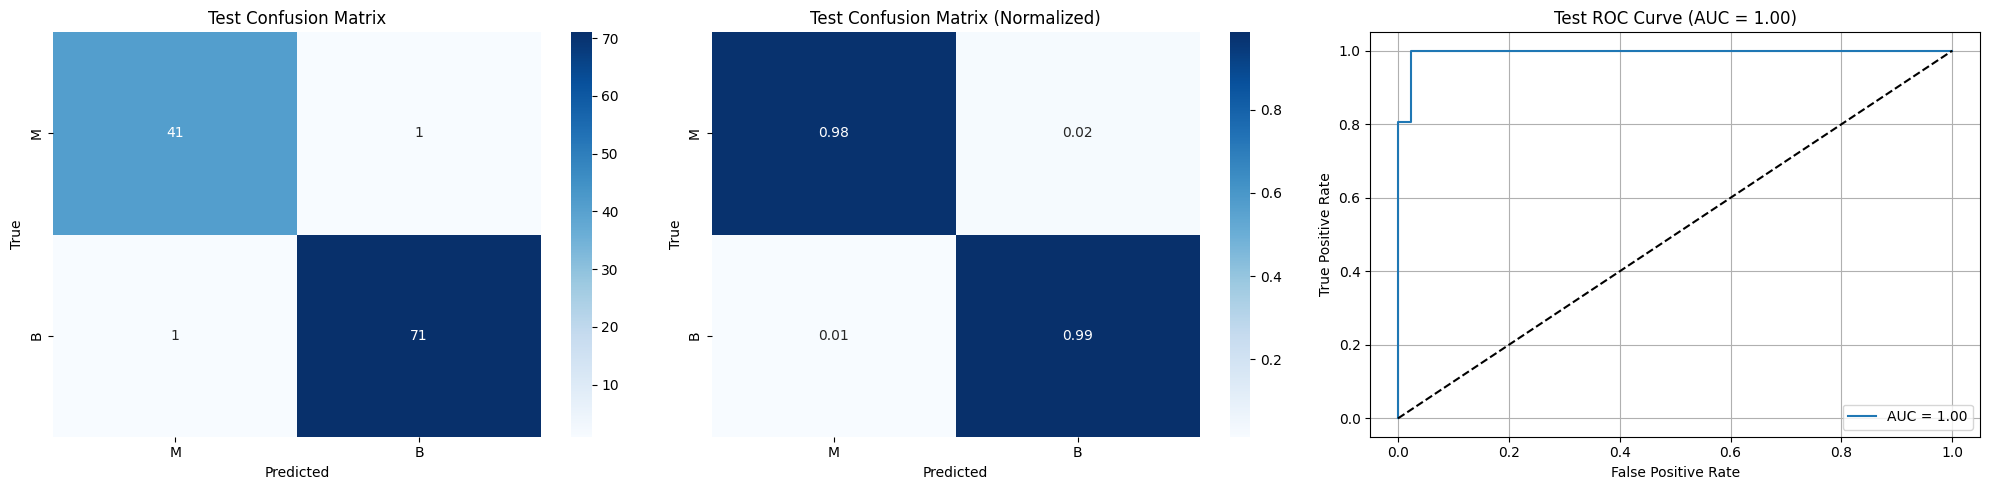

In [40]:
display_metrics(predictions_dict,class_names=["M","B"], best_model_name=Model_accuracy.index[0])

In [41]:
Model_accuracy.to_csv('models accuracy.csv')

In [42]:
# Example usage after getting predictions_dict:
confidence_results = calculate_confidence_metrics(predictions_dict)

# Convert to DataFrame for easier viewing and saving
conf_df_rows = []
for model_name, metrics in confidence_results.items():
    metrics_row = {"Model": model_name}
    metrics_row.update(metrics)
    conf_df_rows.append(metrics_row)

confidence_df = pd.DataFrame(conf_df_rows)
confidence_df.set_index("Model", inplace=True)

# Print and save results

confidence_df.to_csv("model_confidence_metrics Scaling.csv")
confidence_df

,Logistic Regression,K Nearest Neighbors,Support Vector Machine,Decision Tree,Random Forest,Extra Trees,Bagging,Hist Gradient Boosting,AdaBoosting,XGBoost,LightGBM,CatBoost
Model,,,,,,,,,,,,
train_avg_confidence,0.972,0.971,NaN,1.000,0.972,1.000,0.969,0.999,0.693,0.995,1.000,0.991
train_median_confidence,0.999,1.000,NaN,1.000,1.000,1.000,1.000,1.000,0.696,0.999,1.000,0.998
train_high_confidence_ratio,0.978,0.967,NaN,1.000,0.989,1.000,0.989,1.000,0.490,1.000,1.000,1.000
train_confidence_weighted_accuracy,0.991,0.982,NaN,1.000,1.000,1.000,0.999,1.000,1.000,1.000,1.000,1.000
test_avg_confidence,0.955,0.944,NaN,1.000,0.936,0.927,0.938,0.981,0.685,0.978,0.983,0.967
test_median_confidence,0.999,1.000,NaN,1.000,0.990,0.980,1.000,1.000,0.696,0.999,1.000,0.997
test_high_confidence_ratio,0.947,0.912,NaN,1.000,0.921,0.921,0.930,0.982,0.491,0.982,0.982,0.974
test_confidence_weighted_accuracy,0.986,0.967,NaN,0.912,0.968,0.970,0.950,0.975,0.964,0.958,0.963,0.967


I Found Logistic Regression is best in cross validation and F1 score

| **Model**               | **CV F1 Score** | **Train Accuracy** | **Test Accuracy** | **Train Precision** | **Test Precision** | **Train Recall** | **Test Recall** | **Train F1 Score** | **Test F1 Score** |  |  |
| ----------------------- | --------------- | ------------------ | ----------------- | ------------------- | ------------------ | ---------------- | --------------- | ------------------ | ----------------- | --------------------- | ---------------------------- |
| **Logistic Regression** |  97.8            | 98.9               | 98.246            | 98.9                | 98.2               | 98.9             | 98.2            | 98.9               | 98.2              |
